# Final Capstone Project

By Ekaterine(Kate) Jorjoliani

Men's Tennis Grand Slam Winners 
Dataset: https://www.kaggle.com/datasets/wonduk/mens-tennis-grand-slam-winner-dataset

Data preparation/preprocessing

In [7]:
#Load the data, get insights and the first few columns

import pandas as pd
df = pd.read_csv('GrandSlam.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         292 non-null    int64  
 1   TOURNAMENT                   292 non-null    object 
 2   WINNER                       292 non-null    object 
 3   RUNNER-UP                    292 non-null    object 
 4   WINNER_NATIONALITY           292 non-null    object 
 5   WINNER_ATP_RANKING           63 non-null     float64
 6   RUNNER-UP_ATP_RANKING        64 non-null     float64
 7   WINNER_LEFT_OR_RIGHT_HANDED  292 non-null    object 
 8   TOURNAMENT_SURFACE           292 non-null    object 
 9   WINNER_PRIZE                 217 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 22.9+ KB
None
   YEAR       TOURNAMENT          WINNER           RUNNER-UP  \
0  2023  Australian Open  Novak Djokovic  Stefanos Tsitsipas   
1  

In [8]:
#Clean the data(remove missing values)

df.dropna(inplace=True)
print(df.head())

   YEAR       TOURNAMENT           WINNER           RUNNER-UP  \
0  2023  Australian Open   Novak Djokovic  Stefanos Tsitsipas   
1  2022        U.S. Open   Carlos Alcaraz         Casper Rudd   
3  2022      French Open     Rafael Nadal         Casper Rudd   
4  2022  Australian Open     Rafael Nadal     Daniil Medvedev   
5  2021        U.S. Open  Daniil Medvedev      Novak Djokovic   

  WINNER_NATIONALITY  WINNER_ATP_RANKING  RUNNER-UP_ATP_RANKING  \
0            Serbian                 1.0                    3.0   
1            Spanish                 2.0                    5.0   
3            Spanish                 5.0                    8.0   
4            Spanish                 5.0                    2.0   
5            Russian                 2.0                    1.0   

  WINNER_LEFT_OR_RIGHT_HANDED     TOURNAMENT_SURFACE  WINNER_PRIZE  
0                       right  Plexicushion Prestige     2050000.0  
1                       right    DecoTurf - outdoors     2600000.0  

Visualizaions

/var/folders/sm/1phs03r561j3srvbxh6xvtzm0000gn/T/ipykernel_27546/533043377.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


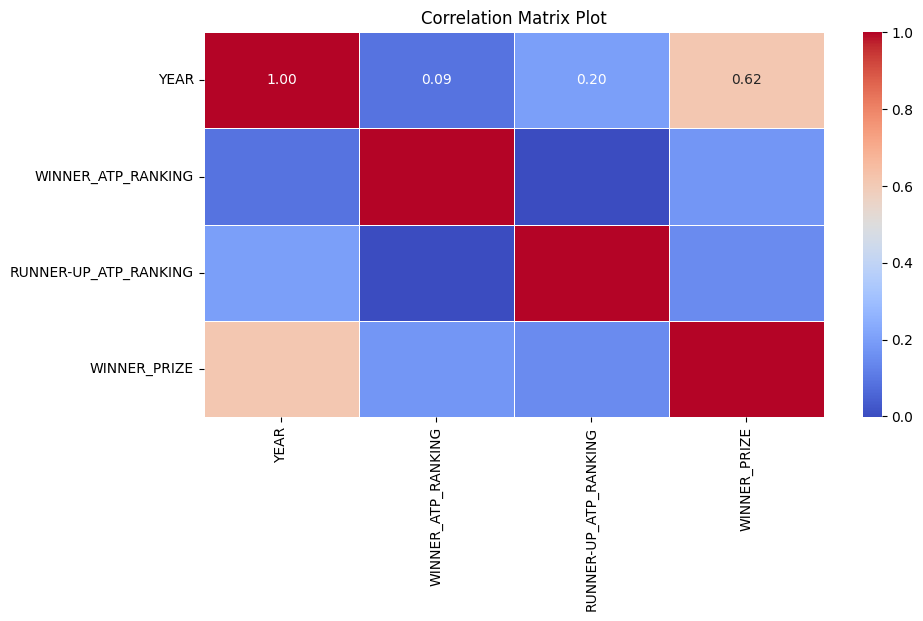

In [9]:
#Create a correlation matrix to see the correlations between variables

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Plot')
plt.show()

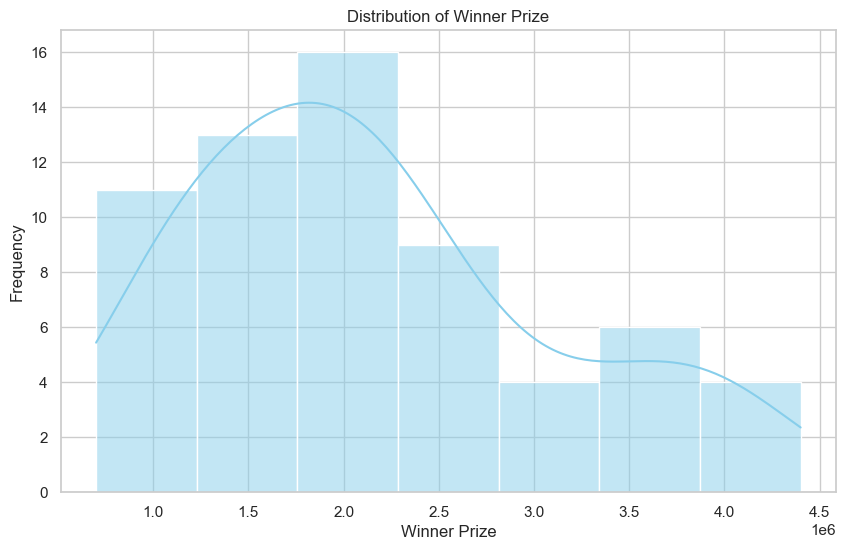

In [10]:
#Create a histogram to see the distribution of the winner prize variable in the dataset

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['WINNER_PRIZE'], kde=True, color='skyblue')
plt.title('Distribution of Winner Prize')
plt.xlabel('Winner Prize')
plt.ylabel('Frequency')
plt.show()

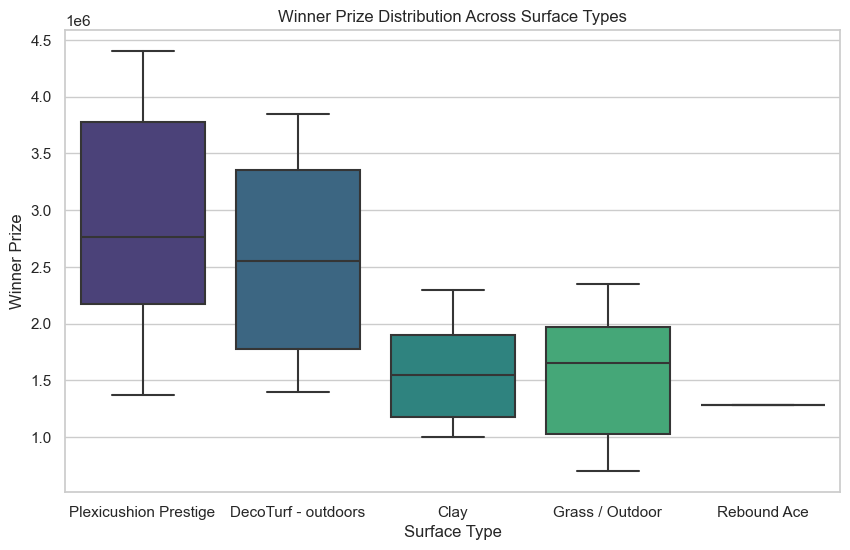

In [11]:
#Create a boxplot to see the distibution of winner prize money across different types of surfaces
#There will be no outliers because we already removed missing values

plt.figure(figsize=(10, 6))
sns.boxplot(x='TOURNAMENT_SURFACE', y='WINNER_PRIZE', data=df, palette='viridis')
plt.title('Winner Prize Distribution Across Surface Types')
plt.xlabel('Surface Type')
plt.ylabel('Winner Prize')
plt.show()

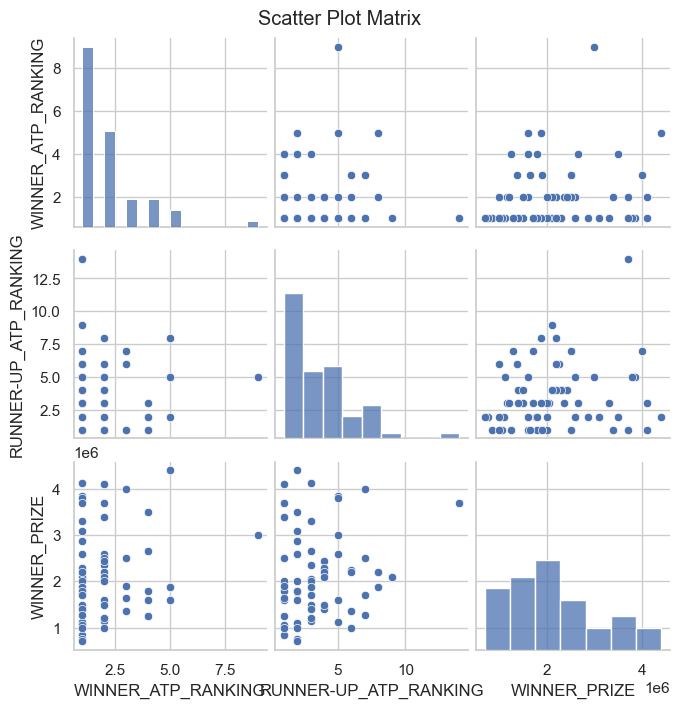

In [14]:
#Create a scatterplot matrix to see the relationship between variables, allow us to observe patterns and correlations

scatter_vars = ['WINNER_ATP_RANKING', 'RUNNER-UP_ATP_RANKING', 'WINNER_PRIZE']
sns.pairplot(df[scatter_vars], height=2.3)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

In [7]:
#Encode categorical variables in order to be able to work with them if numerical variables are needed

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['WINNER_NATIONALITY'] = label_encoder.fit_transform(df['WINNER_NATIONALITY'])
df['WINNER_LEFT_OR_RIGHT_HANDED'] = label_encoder.fit_transform(df['WINNER_LEFT_OR_RIGHT_HANDED'])
df['TOURNAMENT_SURFACE'] = label_encoder.fit_transform(df['TOURNAMENT_SURFACE'])

Model building

1. Regression Model

In [8]:
#Load the necessary libaries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['WINNER_ATP_RANKING', 'RUNNER-UP_ATP_RANKING', 'YEAR']]
y = df['WINNER_PRIZE']

#Split the model into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a linear regression model

model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

#Make predictions
predictions_reg = model_reg.predict(X_test)

#Find and print mean squared error of the predictions
mse_reg = mean_squared_error(y_test, predictions_reg)
print(f'Mean Squared Error (Regression): {mse_reg}')

Mean Squared Error (Regression): 486742065541.7877


In [9]:
#Print the predictions
print(predictions_reg)

[1201941.40207165 1295582.84138542 3381209.99344105 1709742.76429516
 3164413.5281955  2163567.5970574  2735426.06777889 2888236.16872442
 2444421.17080086 1157529.53374887 1384477.32222897 3144839.03221834
 1921863.01526833]


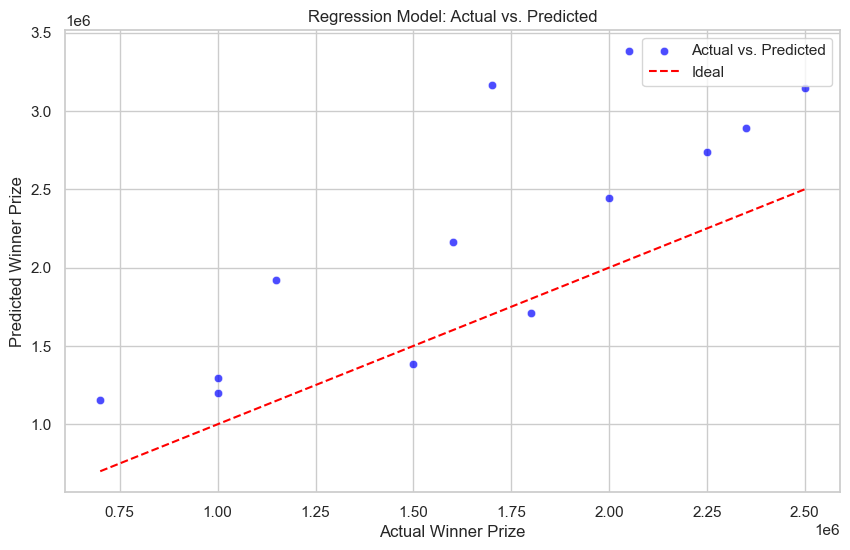

In [10]:
#Load the necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

#Create a scatterplot to see the accuracy of the predictions

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=predictions_reg, alpha=0.7, color='blue', label='Actual vs. Predicted')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal')

plt.title('Regression Model: Actual vs. Predicted')
plt.xlabel('Actual Winner Prize')
plt.ylabel('Predicted Winner Prize')
plt.legend()
plt.show()

2. Decision Tree Classification Model

In [13]:
#Load the necessary libaries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_class = df[['WINNER_NATIONALITY', 'WINNER_LEFT_OR_RIGHT_HANDED']]
y_class = df['WINNER']

#Split the model into training and testing

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

#Create a decision tree classifiication model
model_class = DecisionTreeClassifier()
model_class.fit(X_train_class, y_train_class)

#Make predictions
predictions_class = model_class.predict(X_test_class)

#Find the accuracy percentage and print it and the classification report
accuracy_class = accuracy_score(y_test_class, predictions_class)
print(f'Accuracy (Classification): {accuracy_class}')
print(classification_report(y_test_class, predictions_class))

Accuracy (Classification): 0.9230769230769231
                       precision    recall  f1-score   support

          Andy Murray       1.00      1.00      1.00         1
        Dominic Thiem       0.00      0.00      0.00         1
Juan Martin del Potro       0.00      0.00      0.00         0
       Novak Djokovic       1.00      1.00      1.00         6
         Rafael Nadal       1.00      1.00      1.00         2
        Roger Federer       1.00      1.00      1.00         3

             accuracy                           0.92        13
            macro avg       0.67      0.67      0.67        13
         weighted avg       0.92      0.92      0.92        13



/Users/katejorjoliani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katejorjoliani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katejorjoliani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ka

In [13]:
#Print the predictions
print(predictions_class)

['Rafael Nadal' 'Rafael Nadal' 'Novak Djokovic' 'Novak Djokovic'
 'Novak Djokovic' 'Andy Murray' 'Novak Djokovic' 'Novak Djokovic'
 'Novak Djokovic' 'Roger Federer' 'Roger Federer' 'Juan Martin del Potro'
 'Roger Federer']


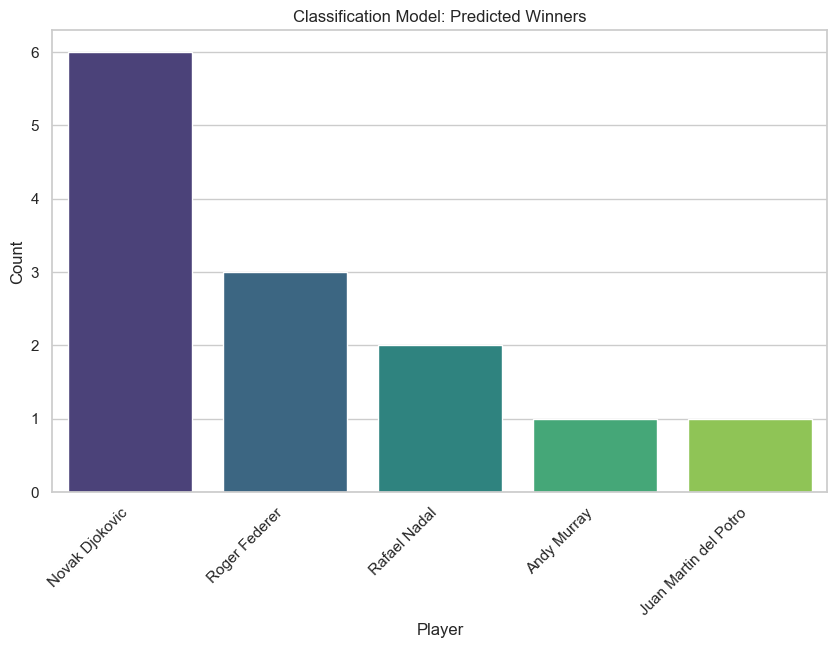

In [14]:
#Load the necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Create a bar plot for predictions
predictions_series = pd.Series(predictions_class)

player_counts = predictions_series.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=player_counts.index, y=player_counts.values, palette='viridis')
plt.title('Classification Model: Predicted Winners')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

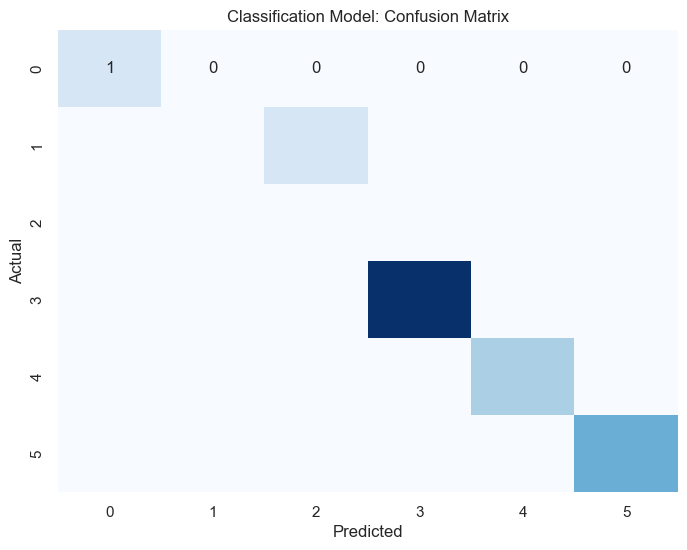

In [15]:
#Load the necessary libraries

from sklearn.metrics import confusion_matrix
import seaborn as sns

#Create a confusion matrix heatmap to see the accuracy
cm = confusion_matrix(y_test_class, predictions_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Classification Model: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This is the only model where the accuracy is very high, it is a great model, however, we will not use it because the target variable is not our primary target variable.

3. Decision Tree Model

In [16]:
#Load the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = df[['WINNER_NATIONALITY', 'WINNER_ATP_RANKING', 'TOURNAMENT_SURFACE']]
y = df['WINNER_PRIZE']

#Split into training and testing models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a decision tree model
model_tree = DecisionTreeRegressor(random_state=42)

model_tree.fit(X_train, y_train)

#Make predictions
predictions_tree = model_tree.predict(X_test)

#Find mean squared error and print it
mse_tree = mean_squared_error(y_test, predictions_tree)
print(f'Mean Squared Error (Decision Tree): {mse_tree}')

Mean Squared Error (Decision Tree): 614071572649.5726


In [17]:
#Print the predictions
print(predictions_tree)

[1666666.66666667 1755000.         2919000.         3550000.
 1580000.         2200000.         1580000.         2200000.
 1400000.          850000.         1400000.         1600000.
 2200000.        ]


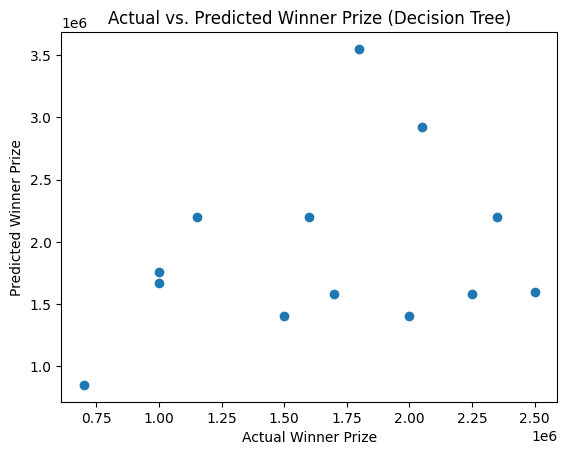

In [61]:
#Create a scatterplot to interpret the accuracy of the results
plt.scatter(y_test, predictions_tree)
plt.xlabel('Actual Winner Prize')
plt.ylabel('Predicted Winner Prize')
plt.title('Actual vs. Predicted Winner Prize (Decision Tree)')
plt.show()

4. Random Forest Model

In [20]:
#Load the necessary libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_reg = df[['YEAR', 'WINNER_ATP_RANKING', 'TOURNAMENT_SURFACE']]
y_reg = df['WINNER_PRIZE']

#Split into training and testing
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

#Create a random forest model
model_reg = RandomForestRegressor(random_state=42)
model_reg.fit(X_train_reg, y_train_reg)

#Make predictions
predictions_reg = model_reg.predict(X_test_reg)

#Find MSE and print it
mse_reg = mean_squared_error(y_test_reg, predictions_reg)
print(f'Mean Squared Error (Random Forest): {mse_reg}')

Mean Squared Error (Random Forest): 424048950023.0769


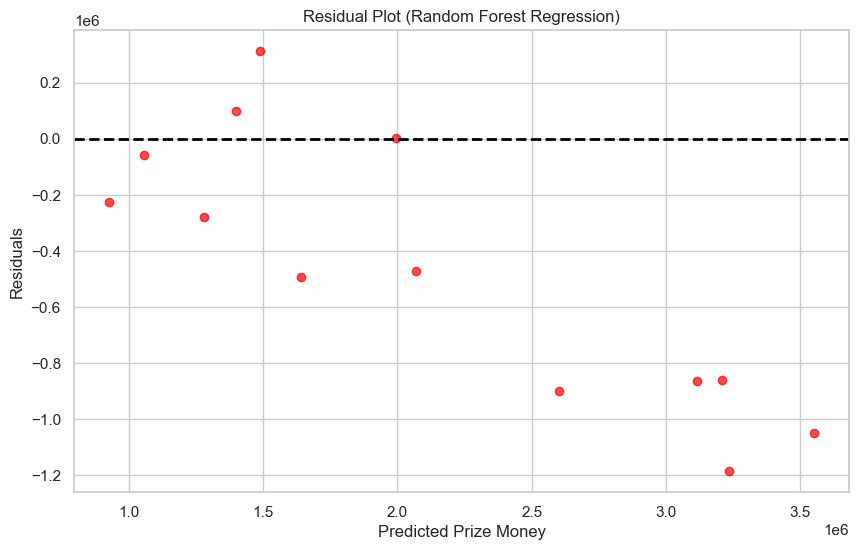

In [22]:
#Load the necessary library and create a residual plot to interpret the accuracy of the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
residuals = y_test_reg - predictions_reg
plt.scatter(predictions_reg, residuals, color='red', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.title('Residual Plot (Random Forest Regression)')
plt.xlabel('Predicted Prize Money')
plt.ylabel('Residuals')
plt.show()